Mounting the gdrive to import the dataset from the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


unpacking the dataset [link text](https://)

In [2]:
! unzip "/content/drive/MyDrive/NLP_Engineer_test.zip"

Archive:  /content/drive/MyDrive/NLP_Engineer_test.zip
   creating: NLP_data_scientist_test/
  inflating: NLP_data_scientist_test/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/NLP_data_scientist_test/
  inflating: __MACOSX/NLP_data_scientist_test/._.DS_Store  
   creating: NLP_data_scientist_test/data/
  inflating: NLP_data_scientist_test/data/.DS_Store  
   creating: __MACOSX/NLP_data_scientist_test/data/
  inflating: __MACOSX/NLP_data_scientist_test/data/._.DS_Store  
  inflating: NLP_data_scientist_test/data/Entity_sentiment_testV2.xlsx  
  inflating: __MACOSX/NLP_data_scientist_test/data/._Entity_sentiment_testV2.xlsx  
  inflating: NLP_data_scientist_test/data/Entity_sentiment_trainV2.xlsx  
  inflating: __MACOSX/NLP_data_scientist_test/data/._Entity_sentiment_trainV2.xlsx  
   creating: NLP_data_scientist_test/test_description/
  inflating: NLP_data_scientist_test/test_description/.DS_Store  
   creating: __MACOSX/NLP_data_scientist_test/test_description/
  inflating: 

importing the neccesary Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Creating the Data frame for the dataset

In [46]:
data_train = pd.read_excel("/content/NLP_data_scientist_test/data/Entity_sentiment_trainV2.xlsx")
data_test = pd.read_excel("/content/NLP_data_scientist_test/data/Entity_sentiment_testV2.xlsx")

In [137]:
print("The shape of our train data:",data_train.shape," The shape of our test data ",data_test.shape)

The shape of our train data: (5999, 3)  The shape of our test data  (1290, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


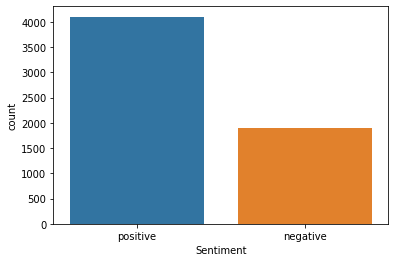

In [184]:
sns.countplot(data_train['Sentiment'])

In [49]:
data_test

,Sentence,Entity
0,I telephoned AXA customer service as we had a ...,staff
1,Got the quote on line which was very straightf...,axa
2,Not enough information on insurance details no...,information
3,It was admittedly at 11pm but they DO claim to...,service
4,Good servicewith very little hassleeasy to use...,price
...,...,...
1285,it is time a policy was tailored for the older...,reward
1286,"then, they just removed the itunes credit rewa...",reward
1287,poor cheap stunt to save money and remove reward.,reward
1288,"the rewards programme, which used to be quite ...",reward


In [50]:
#Data Cleaning and Text Preprocessing
import re
import spacy
from bs4 import BeautifulSoup  
nlp = spacy.load("en_core_web_sm")


In [51]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stopwords = nlp.Defaults.stop_words                 
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stopwords]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [138]:
#cleaning the column by using preprocessing function review_to_words
clean_review = review_to_words( data_train["Sentence"][0] )
print (clean_review)

website easy use insurance running minutes quick simple brilliant


In [53]:
#finding the total length of reviews
num_reviews = data_train["Sentence"].size    #to get the number of reviews
print(num_reviews)

5999


In [54]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5999 non-null   object
 1   Entity     5999 non-null   object
 2   Sentiment  5999 non-null   object
dtypes: object(3)
memory usage: 140.7+ KB


In [62]:
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

Loop over each review; create an index i that goes from 0 to the length of the Sentence
 list

In [63]:
for i in range( 0, num_reviews ):
   # Call our function for each review, and add the result to the list of clean reviews
   clean_train_reviews.append( review_to_words( data_train["Sentence"][i] ) )

In [64]:
len(clean_train_reviews)

5999

In [65]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors(tokens). The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

# see final the clean data
print (train_data_features.shape)
train_data_features

Creating the bag of words...

(5999, 4814)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
#converted vectors
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
y = data_train['Sentiment'].values #target
vocab = vectorizer.get_feature_names()
print (vocab)

['aa', 'aamir', 'abandoned', 'abiding', 'ability', 'able', 'abroad', 'abrupt', 'absence', 'absolute', 'absolutely', 'absolutley', 'absoultely', 'abuse', 'acccount', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'acceptediam', 'accepting', 'accepts', 'access', 'accessed', 'accessibility', 'accessible', 'accessing', 'accident', 'accidental', 'accidentally', 'accidents', 'accommodating', 'accord', 'according', 'account', 'accountmy', 'accounts', 'accrued', 'accumulated', 'accurate', 'accurately', 'achieve', 'achieved', 'acknoledging', 'acknowledged', 'acknowledgements', 'acquire', 'acquiring', 'act', 'acted', 'actining', 'action', 'actions', 'activate', 'active', 'actively', 'activity', 'actual', 'actually', 'ad', 'ada', 'adam', 'adapt', 'adapted', 'adays', 'add', 'adddress', 'added', 'adding', 'addition', 'additional', 'additions', 'addres', 'address', 'addressed', 'addresses', 'adds', 'adjust', 'adjustable', 'adjuster', 'adjusters', 'adjusting', 'adjustments', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
y

array(['positive', 'positive', 'negative', ..., 'positive', 'positive',
       'negative'], dtype=object)

In [70]:
#to convert the labels into numbers
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()#initialise
y = LE.fit_transform(data_train['Sentiment'])
LE.classes_ #it shows either positive or negative
y


X = train_data_features #sentences
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [71]:
#To print the count of each word
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

2 aa
1 aamir
1 abandoned
2 abiding
7 ability
109 able
2 abroad
2 abrupt
2 absence
10 absolute
20 absolutely
2 absolutley
1 absoultely
1 abuse
1 acccount
4 accent
1 accents
54 accept
10 acceptable
1 acceptance
14 accepted
1 acceptediam
7 accepting
1 accepts
104 access
4 accessed
1 accessibility
5 accessible
7 accessing
39 accident
7 accidental
4 accidentally
5 accidents
2 accommodating
1 accord
2 according
172 account
1 accountmy
1 accounts
1 accrued
1 accumulated
6 accurate
1 accurately
1 achieve
2 achieved
2 acknoledging
3 acknowledged
1 acknowledgements
1 acquire
1 acquiring
2 act
1 acted
1 actining
7 action
2 actions
4 activate
1 active
1 actively
2 activity
8 actual
29 actually
2 ad
1 ada
1 adam
1 adapt
1 adapted
1 adays
73 add
1 adddress
26 added
4 adding
4 addition
36 additional
2 additions
1 addres
47 address
2 addressed
5 addresses
1 adds
4 adjust
1 adjustable
2 adjuster
3 adjusters
3 adjusting
2 adjustments
1 adjustor
16 admin
8 administration
2 administrative
1 administrator


In [39]:
len(train_data_features)

6005

In [143]:
from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = dict()
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    

In [ ]:
lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

In [74]:
#spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Decision Tree Classifier

In [146]:
print( "Training the Decision Tree Classifier...")
from sklearn.tree import DecisionTreeClassifier
# Initialize a Random Forest classifier with 100 trees
tree = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
tree = tree.fit(x_train,y_train)
y_pred_tree = tree.predict(x_test)
lst_accu_stratified["Decison Tree"] = tree.score(x_test_fold, y_test_fold)

Training the Decision Tree Classifier...


Random Forest

In [150]:
print( "Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(x_train,y_train)
y_pred_forest = tree.predict(x_test)
lst_accu_stratified["Random forest"] = forest.score(x_test_fold, y_test_fold)

Training the random forest...


In [154]:
print( "Training the Logistic Regresion...")
from sklearn.linear_model import LogisticRegression

# Initialize a Random Forest classifier with 100 trees
LR = LogisticRegression() 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
LR = LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)
lst_accu_stratified["Logistic Regresion"] = LR.score(x_test_fold, y_test_fold)

Training the Logistic Regresion...


In [156]:
lst_accu_stratified

{'Decison Tree': 0.6861435726210351,
 'Gausian Naive Bayes': 0.6527545909849749,
 'Logistic Regresion': 0.9432387312186978,
 'Multinomial Naive Bayes': 0.8998330550918197,
 'Random forest': 0.9799666110183639}

Naive Bayes

In [152]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB


model_M = MultinomialNB()
model_G = GaussianNB()

model_M.fit(x_train,y_train)
model_G.fit(x_train,y_train)

y_pred_M = model_M.predict(x_test)
y_pred_G = model_G.predict(x_test)

lst_accu_stratified["Multinomial Naive Bayes"] = model_M.score(x_test_fold, y_test_fold)
lst_accu_stratified["Gausian Naive Bayes"] = model_G.score(x_test_fold, y_test_fold)

In [190]:
pd.DataFrame.from_dict(lst_accu_stratified,orient = "index")
  

,0
Decison Tree,0.686144
Multinomial Naive Bayes,0.899833
Gausian Naive Bayes,0.652755
Random forest,0.979967
Logistic Regresion,0.943239


In [157]:
from sklearn.metrics import confusion_matrix, classification_report
#multimonial
cm_M = confusion_matrix(y_test,y_pred_M)
cr_M = classification_report(y_test,y_pred_M)

#gausian
cm_G = confusion_matrix(y_test,y_pred_G)
cr_G = classification_report(y_test,y_pred_G)

#decison tree
cr_tree = classification_report(y_test,y_pred_tree)
cm_tree = confusion_matrix(y_test,y_pred_tree)



#random forest
cm_forest  = confusion_matrix(y_test,y_pred_forest)
cr_forest = classification_report(y_test,y_pred_forest)



#LR
cm_LR  = confusion_matrix(y_test,y_pred_LR)
cr_LR = classification_report(y_test,y_pred_LR)

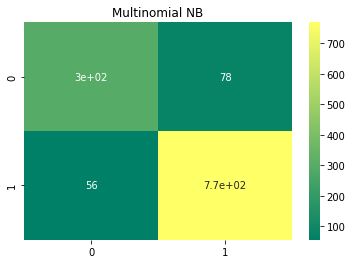

  Multinomial NB 
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       375
           1       0.91      0.93      0.92       825

    accuracy                           0.89      1200
   macro avg       0.87      0.86      0.87      1200
weighted avg       0.89      0.89      0.89      1200



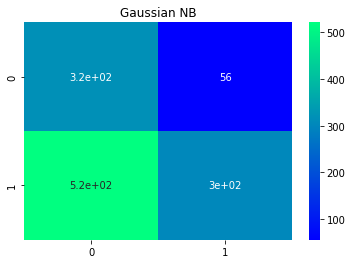

Gausian Naive Bayes 
               precision    recall  f1-score   support

           0       0.38      0.85      0.53       375
           1       0.84      0.37      0.51       825

    accuracy                           0.52      1200
   macro avg       0.61      0.61      0.52      1200
weighted avg       0.70      0.52      0.52      1200



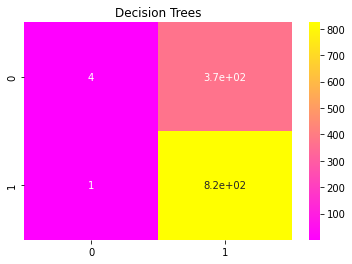

Decision Trees 
               precision    recall  f1-score   support

           0       0.80      0.01      0.02       375
           1       0.69      1.00      0.82       825

    accuracy                           0.69      1200
   macro avg       0.74      0.50      0.42      1200
weighted avg       0.72      0.69      0.57      1200



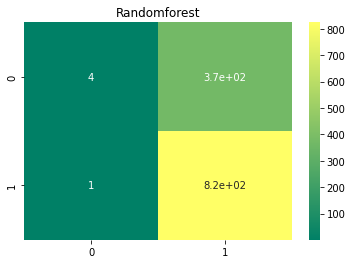

Random Forest 
               precision    recall  f1-score   support

           0       0.80      0.01      0.02       375
           1       0.69      1.00      0.82       825

    accuracy                           0.69      1200
   macro avg       0.74      0.50      0.42      1200
weighted avg       0.72      0.69      0.57      1200



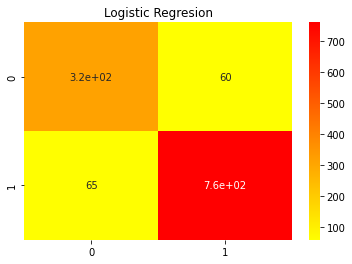

Logistic Regresion 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       375
           1       0.93      0.92      0.92       825

    accuracy                           0.90      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.90      0.90      0.90      1200



In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_M,annot = True, cmap='summer')
plt.title('Multinomial NB')
plt.show()
print('='*50)
print("  Multinomial NB","\n",cr_M)

print('='*50)
plt.title('Gaussian NB')
sns.heatmap(cm_G,annot= True, cmap='winter')
plt.show()
print('='*50)
print("Gausian Naive Bayes","\n",cr_G)



print('='*50)
plt.title('Decision Trees')
sns.heatmap(cm_tree,annot= True, cmap='spring')
plt.show()
print('='*50)
print("Decision Trees","\n",cr_tree)


print('='*50)
plt.title('Randomforest')
sns.heatmap(cm_forest,annot = True, cmap='summer')
plt.show()
print('='*50)
print("Random Forest","\n",cr_forest)



print('='*50)
plt.title('Logistic Regresion')
sns.heatmap(cm_LR,annot = True, cmap='autumn_r')
plt.show()
print('='*50)
print("Logistic Regresion","\n",cr_LR)

Validating the data

In [115]:
test = data_test['Sentence']
num_reviews = len(test)
clean_reviews_test = []


In [116]:
#cleaning the data
for i in range( 0, num_reviews ):
   # Call our function for each review, and add the result to the list of clean reviews
   clean_reviews_test.append( review_to_words( test[i] ) )

In [110]:
#convert the data to vector
test_data_features = vectorizer.transform(clean_reviews_test)

In [111]:
test_data_features

<1290x4814 sparse matrix of type '<class 'numpy.int64'>'
	with 9251 stored elements in Compressed Sparse Row format>

In [163]:
#prediction reslts for validation dataset sing different ml models
MNB =model_M.predict(test_data_features) #Multinomial Naive Bayes
#GNB = model_G.predict(test_data_features) #Gausian Naive Bayes
DT = tree.predict(test_data_features) #Decision Tree 
RF = forest.predict(test_data_features) #Random forest
LR = LR.predict(test_data_features) #Logistic Regresion

In [123]:
test_data_features[50]

<1x4814 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [164]:
#Verifying the model with sample data
valid_data = data_train['Sentence'][8]

valid_data_features = vectorizer.transform([valid_data])

In [132]:
test_data_features = vectorizer.transform(clean_reviews_test)

In [135]:
model_M.predict(valid_data_features)

array([1])

In [165]:
LE.inverse_transform(forest.predict(valid_data_features))

array(['positive'], dtype=object)

In [171]:
result = pd.DataFrame({"Predicted Sentiment":LE.inverse_transform(forest.predict(test_data_features))})

In [170]:
data_test

,Sentence,Entity
0,I telephoned AXA customer service as we had a ...,staff
1,Got the quote on line which was very straightf...,axa
2,Not enough information on insurance details no...,information
3,It was admittedly at 11pm but they DO claim to...,service
4,Good servicewith very little hassleeasy to use...,price
...,...,...
1285,it is time a policy was tailored for the older...,reward
1286,"then, they just removed the itunes credit rewa...",reward
1287,poor cheap stunt to save money and remove reward.,reward
1288,"the rewards programme, which used to be quite ...",reward


In [175]:
final_result = [data_test,result]

In [176]:
pd.DataFrame(final_result)

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


,0
0,...
1,Predicted Sentiment 0 posit...


In [178]:
Final_result = pd.concat([data_test,result], join = 'outer', axis = 1)


In [180]:
Final_result.to_excel("submission.xlsx",sheet_name='Sentimental Analysis')

In [183]:
import pickle
pickle.dump(model_M, open("/content/NLP_data_scientist_test/models/Multinomial Naive Bayes.sav", 'wb'))
pickle.dump(model_G, open("/content/NLP_data_scientist_test/models/Gausian Naive Bayes.sav", 'wb'))
pickle.dump(tree, open("/content/NLP_data_scientist_test/models/Decision Tree.sav", 'wb'))
pickle.dump(forest, open("/content/NLP_data_scientist_test/models/Random Forest.sav", 'wb'))
pickle.dump(LR, open("/content/NLP_data_scientist_test/models/Logistic Regresion.sav", 'wb'))